In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving student_depression_dataset.csv to student_depression_dataset.csv


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

df = pd.read_csv("student_depression_dataset.csv")

y = df["Depression"]

X_A = df.drop(columns=["id", "Depression"])

X_B = df.drop(columns=["id", "Depression", "Have you ever had suicidal thoughts ?"])

X_train_A, X_test_A, y_train, y_test = train_test_split(
    X_A, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_B = X_train_A.drop(columns=["Have you ever had suicidal thoughts ?"])
X_test_B = X_test_A.drop(columns=["Have you ever had suicidal thoughts ?"])



In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def entrenar_logistic(X_train, X_test, y_train, y_test):
    num_cols = X_train.select_dtypes(include=["int64","float64"]).columns
    cat_cols = X_train.select_dtypes(include=["object"]).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
        ]
    )

    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("classifier", LogisticRegression(max_iter=1000))
        ]
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    return model, y_pred

print("LOGISTIC A")
model_logA, y_pred_logA = entrenar_logistic(X_train_A, X_test_A, y_train, y_test)

print("LOGISTIC B")
model_logB, y_pred_logB = entrenar_logistic(X_train_B, X_test_B, y_train, y_test)

LOGISTIC A
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

LOGISTIC B
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      2313
           1       0.81      0.85      0.83      3268

    accuracy                           0.80      5581
   macro avg       0.79      0.79      0.79      5581
weighted avg       0.80      0.80      0.80      5581



In [ ]:
from sklearn.ensemble import RandomForestClassifier

def entrenar_rf(X_train, X_test, y_train, y_test):
    num_cols = X_train.select_dtypes(include=["int64","float64"]).columns
    cat_cols = X_train.select_dtypes(include=["object"]).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", "passthrough", num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
        ]
    )

    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("classifier", RandomForestClassifier(
                n_estimators=200,
                random_state=42
            ))
        ]
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    return model, y_pred

print("RF A")
model_rfA, y_pred_rfA = entrenar_rf(X_train_A, X_test_A, y_train, y_test)

print("RF B")
model_rfB, y_pred_rfB = entrenar_rf(X_train_B, X_test_B, y_train, y_test)

RF A
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

RF B
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2313
           1       0.81      0.85      0.83      3268

    accuracy                           0.79      5581
   macro avg       0.79      0.78      0.78      5581
weighted avg       0.79      0.79      0.79      5581



In [ ]:
!pip -q install xgboost
from xgboost import XGBClassifier

def entrenar_xgb(X_train, X_test, y_train, y_test):
    num_cols = X_train.select_dtypes(include=["int64","float64"]).columns
    cat_cols = X_train.select_dtypes(include=["object"]).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", "passthrough", num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
        ]
    )

    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("classifier", XGBClassifier(
                n_estimators=400,
                max_depth=5,
                learning_rate=0.05,
                random_state=42,
                eval_metric="logloss"
            ))
        ]
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    return model, y_pred

print("XGB A")
model_xgbA, y_pred_xgbA = entrenar_xgb(X_train_A, X_test_A, y_train, y_test)

print("XGB B")
model_xgbB, y_pred_xgbB = entrenar_xgb(X_train_B, X_test_B, y_train, y_test)

XGB A
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581

XGB B
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2313
           1       0.81      0.85      0.83      3268

    accuracy                           0.80      5581
   macro avg       0.79      0.79      0.79      5581
weighted avg       0.80      0.80      0.80      5581



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def resumen(nombre, y_pred):
    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
    }

rows = [
    resumen("Logistic A", y_pred_logA),
    resumen("Logistic B", y_pred_logB),
    resumen("RF A", y_pred_rfA),
    resumen("RF B", y_pred_rfB),
    resumen("XGBoost A", y_pred_xgbA),
    resumen("XGBoost B", y_pred_xgbB),
]

df_metrics = pd.DataFrame(rows).sort_values(by="F1", ascending=False)

df_metrics

,Modelo,Accuracy,Precision,Recall,F1
0,Logistic A,0.842860,0.857613,0.877295,0.867342
4,XGBoost A,0.841426,0.855566,0.877295,0.866294
2,RF A,0.838380,0.847124,0.883415,0.864889
5,XGBoost B,0.798244,0.814261,0.849143,0.831336
1,Logistic B,0.796452,0.812793,0.847613,0.829838
3,RF B,0.792331,0.805387,0.850979,0.827555


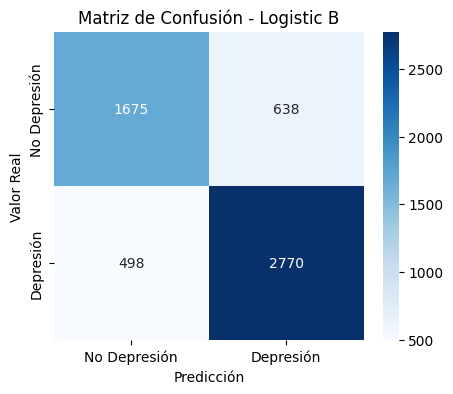

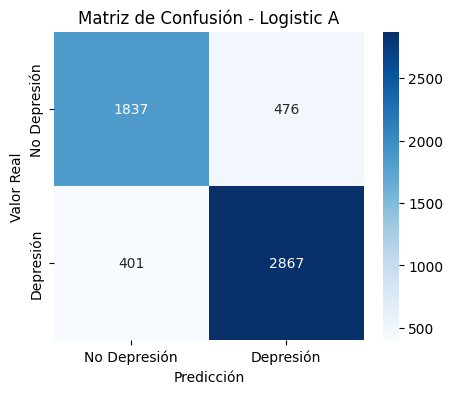

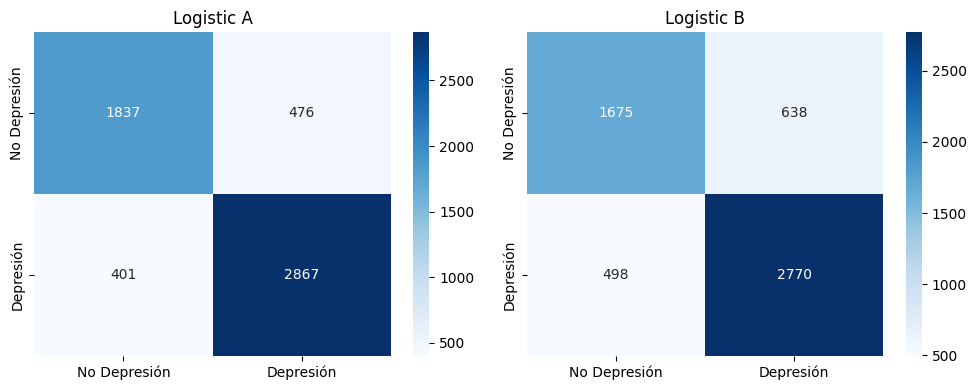

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_logB = confusion_matrix(y_test, y_pred_logB)

plt.figure(figsize=(5,4))
sns.heatmap(cm_logB, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"])

plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Logistic B")
plt.show()

cm_logB

cm_logA = confusion_matrix(y_test, y_pred_logA)

plt.figure(figsize=(5,4))
sns.heatmap(cm_logA, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"])

plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Logistic A")
plt.show()

cm_logA

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(cm_logA, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"],
            ax=axes[0])
axes[0].set_title("Logistic A")

sns.heatmap(cm_logB, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"],
            ax=axes[1])
axes[1].set_title("Logistic B")

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold

def plot_learning_curve(models_dict, X, y, title="Comparación de accuracy en validación"):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes = np.linspace(0.1, 1.0, 8)

    plt.figure(figsize=(8,5))

    for name, model in models_dict.items():
        sizes, train_scores, val_scores = learning_curve(
            model, X, y,
            cv=cv,
            scoring="accuracy",
            train_sizes=train_sizes,
            n_jobs=-1
        )
        val_mean = val_scores.mean(axis=1)
        plt.plot(sizes, val_mean, marker="o", label=name)

    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Accuracy (validación)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

models_dict = {
    "Logistic B": model_logB,
    "RF B": model_rfB,
    "XGBoost B": model_xgbB
}

plot_learning_curve(models_dict, X_B, y, title="Comparación de Accuracy en Validación (Modelo B)")

In [ ]:
print("model_logB" in globals())
print("model_rfB" in globals())
print("model_xgbB" in globals())

True
True
True
